In [76]:
import tensorflow as tf

- Convolution ( Feature Detection )
- Activation Function ( ReLU ) - Add non-linearity to the network
- Pooling (Downsampling )
- Flattening
- Fully Connected ANN

[Live Convolution](http://setosa.io/ev/image-kernels/)  - **Image Kernels**

Q : What is Convolution? </p>
A : An image kernel is a small matrix used to apply effects like the ones you might find in Photoshop or Gimp, such as blurring, sharpening, outlining or embossing. They're also used in machine learning for 'feature extraction', a technique for determining the most important portions of an image. In this context the process is referred to more generally as "convolution" 

[Live Illustration - Pooling](http://scs.ryerson.ca/~aharley/vis/conv/flat.html)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [78]:
tf.__version__

'2.14.0'

In [79]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')

fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep=',')

In [80]:
#alternative way to load mnist dataset
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()



## STEP 2: DATA VISUALIZATION

In [81]:
fashion_train_df.head(2)
#each image is 28*28 = 784 pixels

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
traiing = np.array(fashion_train_df, dtype= 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [83]:
traiing.shape

(60000, 785)

In [84]:
i =  random.randint(1,60000)

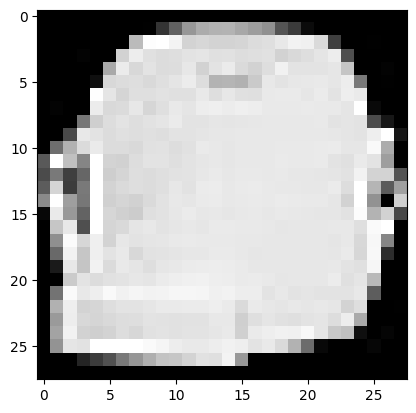

In [85]:
plt.imshow(traiing[i,1:].reshape((28,28)),cmap='gray')

In [86]:
traiing[i,0]

8.0

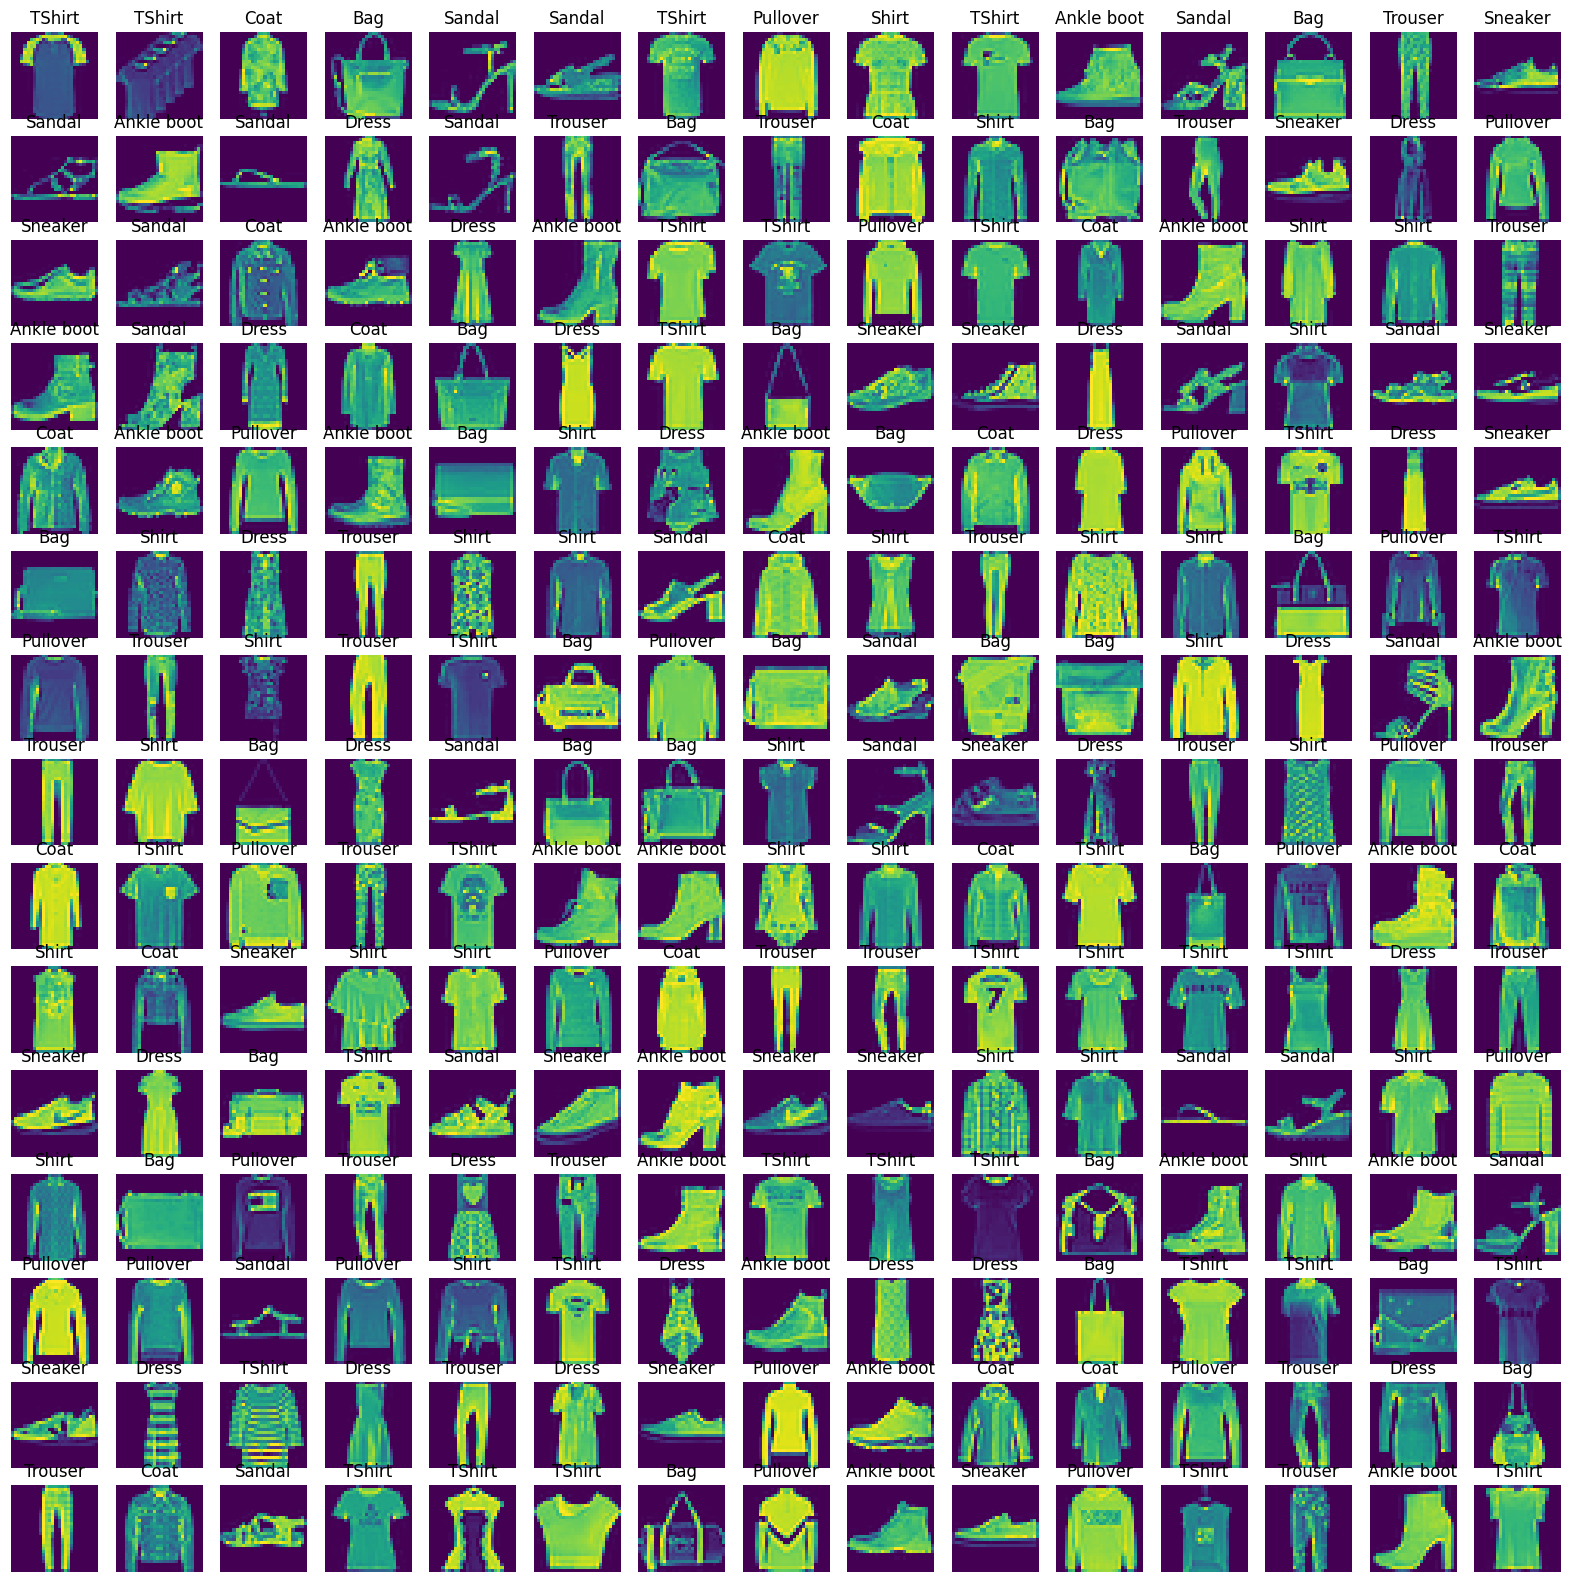

In [87]:
labels = ['TShirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid,w_grid,figsize=(20,20))
axes = axes.ravel()

n_training = len(traiing)

for i in np.arange(0,w_grid*l_grid):
    #Select random number 
    index = random.randint(1,n_training)
    axes[i].imshow(traiing[index,1:].reshape((28,28)))
    l =  int(traiing[index,0])
    axes[i].set_title(labels[l])
    axes[i].axis('off')


In [88]:
x_train = traiing[:,1:]/255
y_train = traiing[:,0]

In [89]:
x_test = testing[:,1:]/255
y_test = testing[:,0]

In [97]:
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_train.shape
y_train.shape

(60000,)

In [91]:
from tensorflow.keras import datasets,layers,models 
cnn = models.Sequential()

cnn.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(10,activation='softmax'))

cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [92]:
x_train.shape

(60000, 784)

In [98]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
#hist = cnn.fit(x_train,y_train,batch_size=512)


In [99]:
hist = cnn.fit(x_train,y_train)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.4873 - accuracy: 0.8225


from tensorflow.keras import dataset,layers, models